<a href="https://colab.research.google.com/github/jaideepgadekar/Arihant_AUV_CVI/blob/main/Arihant_CVI_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from PIL import Image
import random
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense,Dropout ,Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Activation
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x
image_path = "drive/My Drive/Data for DL/"
img,x = get_image(image_path + 'drone/' + '00000000.jpg')
print(img, x.shape)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F131C7D7BA8> (1, 224, 224, 3)


In [ ]:
root = 'drive/My Drive/Data for DL'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

print(categories)

['drive/My Drive/Data for DL/rocket', 'drive/My Drive/Data for DL/passenger-plane', 'drive/My Drive/Data for DL/helicopter', 'drive/My Drive/Data for DL/fighter-jet', 'drive/My Drive/Data for DL/missile', 'drive/My Drive/Data for DL/drone']


In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [ ]:
print(num_classes)
random.seed(4)
random.shuffle(data)


6


In [ ]:
train_spllit = 0.9
test_split = 0.1

In [ ]:
idx_test = int(train_split * len(data))
train = data[:idx_test]
test = data[idx_test:]

In [ ]:
#split data into X and Y
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[4, 4, 4, 0, 3, 5, 5, 1, 5, 3, 3, 5, 4, 2, 0, 4, 0, 3, 3, 3, 1, 3, 2, 5, 2, 4, 1, 4, 3, 0, 0, 4, 5, 4, 4, 5, 5, 3, 1, 1, 0, 3, 5, 1, 3, 1, 3, 1, 4, 5, 0, 1, 3, 4, 2, 5, 3, 4, 4, 3, 1, 3, 0, 5, 5, 2, 1, 5, 3, 0, 3, 1, 5, 3, 1, 3, 4, 3, 0, 3, 4, 4, 1, 1, 4, 3, 2, 0, 1, 3, 2, 4, 1, 0, 4, 0, 5, 2, 4, 2, 5, 5, 2, 1, 3, 4, 3, 5, 0, 1, 5, 4, 3, 0, 4, 4, 3, 4, 0, 0, 3, 1, 3, 2, 3, 4, 1, 2, 3, 5, 3, 4, 0, 2, 3, 0, 2, 5, 3, 5, 4, 5, 2, 5, 0, 5, 3, 5, 2, 5, 5, 2, 2, 3, 3, 3, 5, 4, 1, 1, 3, 3, 3, 2, 5, 1, 2, 1, 4, 4, 4, 4, 3, 5, 3, 2, 5, 5, 5, 3, 2, 2, 5, 0, 4, 5, 2, 1, 2, 4, 1, 1, 3, 0, 2, 3, 4, 5, 4, 2, 0, 5, 3, 2, 5, 3, 2, 5, 0, 3, 5, 2, 1, 3, 4, 3, 5, 2, 4, 0, 0, 0, 1, 3, 3, 5, 1, 1, 1, 4, 5, 5, 2, 3, 2, 3, 3, 5, 4, 1, 2, 5, 5, 3, 3, 0, 4, 3, 4, 5, 1, 3, 2, 4, 3, 0, 5, 1, 1, 0, 4, 4, 5, 2, 4, 5, 0, 0, 0, 5, 0, 1, 5, 4, 2, 5, 1, 0, 0, 1, 5, 5, 3, 5, 2, 0, 0, 2, 5, 5, 5, 2, 2, 1, 4, 4, 3, 3, 0, 2, 2, 3, 4, 5, 0, 0, 4, 3, 3, 3, 4, 2, 2, 0, 2, 3, 2, 3, 1, 3, 4, 5, 4, 1, 4, 3, 2, 2, 3, 2, 1, 0, 4, 

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(2533, 6)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train/ test split: %d, %d"%(len(x_train), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 8442 images from 6 categories
train/ test split: 5909, 2533
training data shape:  (5909, 224, 224, 3)
training labels shape:  (5909, 6)


In [ ]:
# load model without output layer
vgg = keras.applications.VGG16(weights='imagenet', include_top= True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
inp = vgg.input
new_classfication_layer = Dense(6, activation= 'softmax')
out = new_classfication_layer(vgg.layers[-2].output)
model_new = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-3]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-3:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
history = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=15)

Epoch 1/15
47/47 [==============================] - 11s 244ms/step - loss: 4.8166 - accuracy: 0.2765
Epoch 2/15
47/47 [==============================] - 11s 244ms/step - loss: 1.1693 - accuracy: 0.5451
Epoch 3/15
47/47 [==============================] - 11s 245ms/step - loss: 0.8458 - accuracy: 0.6818
Epoch 4/15
47/47 [==============================] - 11s 243ms/step - loss: 0.6038 - accuracy: 0.7676
Epoch 5/15
47/47 [==============================] - 11s 244ms/step - loss: 0.4383 - accuracy: 0.8294
Epoch 6/15
47/47 [==============================] - 11s 244ms/step - loss: 0.3360 - accuracy: 0.8702
Epoch 7/15
47/47 [==============================] - 11s 244ms/step - loss: 0.2434 - accuracy: 0.9017
Epoch 8/15
47/47 [==============================] - 11s 244ms/step - loss: 0.1861 - accuracy: 0.9201
Epoch 9/15
47/47 [==============================] - 11s 244ms/step - loss: 0.1640 - accuracy: 0.9200
Epoch 10/15
47/47 [==============================] - 11s 244ms/step - loss: 0.1571 - accura

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.10495924949646
Test accuracy: 0.5874457359313965


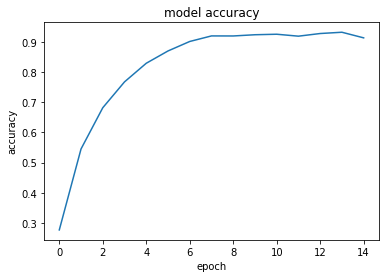

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report
Y_pred = model_new.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
target_names = ['rocket', 'passener-plane','missile','helicopter', 'fighter-jet', 'drone' ]
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[ 74  38   2 144  64   7]
 [  2 333  11  41  32  10]
 [  0  50 301  17  20  13]
 [102 116  13 262  49  22]
 [ 11  56   7  45 278  13]
 [  2  67  18  39  34 240]]
Classification Report
                precision    recall  f1-score   support

        rocket       0.39      0.22      0.28       329
passener-plane       0.50      0.78      0.61       429
       missile       0.86      0.75      0.80       401
    helicopter       0.48      0.46      0.47       564
   fighter-jet       0.58      0.68      0.63       410
         drone       0.79      0.60      0.68       400

      accuracy                           0.59      2533
     macro avg       0.60      0.58      0.58      2533
  weighted avg       0.60      0.59      0.58      2533

